In [16]:
import numpy as np
from scipy.spatial.distance import hamming
n=int(input("Enter the value of 'n': "))
a=[None]*n
b=[None]*n
#for i in range (0,n): ; usar numpy implica menos uso computacional y mayor especificidad
a= np.random.randint(2, size=n)
b= np.random.randint(2, size=n)

print(a)
print(b)

[0 1 0 0 1 0 0 1 1 1]
[1 0 0 1 0 0 1 0 0 0]


In [18]:
from sklearn.neighbors import DistanceMetric
#from sklearn.metrics import hamming_loss
#import numpy as np
#hamming_loss(a,b)
haming_d = hamming(a,b)*len(a)
print(haming_d)

8.0


La medida de Hamming es la fracción de etiquetas diferentes

In [6]:
def vecinos (x):
  x=[]
  x = np.random.randint()
  print(x)

vecinos(3)

IndexError: list assignment index out of range

In [ ]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
KNeighborsClassifier(...)
print(neigh.predict([[1.1]]))
print(neigh.predict_proba([[0.9]]))


[0]
[[0.66666667 0.33333333]]


In [ ]:
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('euclidean')
X = [[0, 1, 2],
         [3, 4, 5]]
dist.pairwise(X)
array([[ 0.        ,  5.19615242],
       [ 5.19615242,  0.        ]])

In [ ]:
ks = range(1,26)
scores = {}
scores_list = []
for k in ks:
  knn = KNeighborsClassifier(n_neighbors=k, p = 2)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test, y_pred)
  scores_list.append(metrics.accuracy_score(y_test, y_pred))
print(scores)
print(scores_list)

In [ ]:
#tercero
# la base de datos boston housing  basada en los datos de vivienda de boston en 1970, esta misma es una regresion lienal por sus datos continuos (contables)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

boston = load_boston()
Boston_df = pd.DataFrame(boston['data'], columns = boston['feature_names'])

Labels = boston['target']
names = boston['feature_names']

Boston_df.head()
Boston_df.dtypes
Boston_df.info()
Boston_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


C:\Users\Usuario\Downloads\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

(506, 13)

In [2]:
print(Boston_df.iloc[:,[0,2,3]])

        CRIM  INDUS  CHAS
0    0.00632   2.31   0.0
1    0.02731   7.07   0.0
2    0.02729   7.07   0.0
3    0.03237   2.18   0.0
4    0.06905   2.18   0.0
..       ...    ...   ...
501  0.06263  11.93   0.0
502  0.04527  11.93   0.0
503  0.06076  11.93   0.0
504  0.10959  11.93   0.0
505  0.04741  11.93   0.0

[506 rows x 3 columns]


In [3]:
Boston_df['CRIM'] = boston['target']
Boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
print(Boston_df.isnull())

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  
0      False  False  False  
1      False  Fal

<AxesSubplot:>

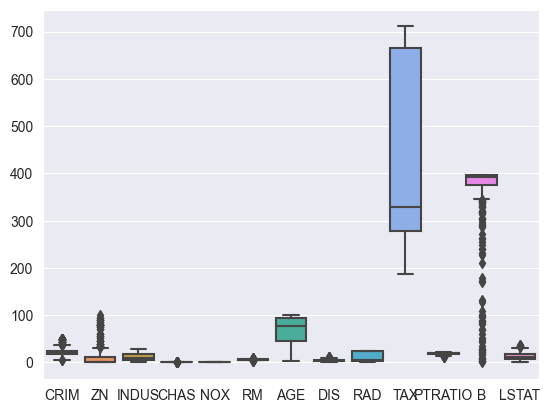

In [5]:
sns.boxplot(Boston_df)

In [6]:
from sklearn.preprocessing import Normalizer
norm_boston = Normalizer().fit(Boston_df)